In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load DataSet:-***

In [28]:
#load the dataset
df = pd.read_csv('/content/placement_dataset.csv')

In [29]:
df.head()

,IQ,CGPA,Communication_Skill,Technical_Skill,Extracurricular_Activity,Internship_Experience,Leadership_Skill,Placement
0,141.0,6.7,2,4,7,4,3,1
1,52.0,6.1,8,3,7,2,4,0
2,103.0,4.9,7,3,10,4,5,1
3,132.0,5.1,8,5,3,3,7,0
4,139.0,4.0,3,1,1,1,9,1


In [30]:
#shape of dataset
df.shape

(3000, 8)

#***EDA(Explotary Data Analysis):-***

In [31]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IQ                        3000 non-null   float64
 1   CGPA                      3000 non-null   float64
 2   Communication_Skill       3000 non-null   int64  
 3   Technical_Skill           3000 non-null   int64  
 4   Extracurricular_Activity  3000 non-null   int64  
 5   Internship_Experience     3000 non-null   int64  
 6   Leadership_Skill          3000 non-null   int64  
 7   Placement                 3000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 187.6 KB


In [32]:
#description
df.describe()

,IQ,CGPA,Communication_Skill,Technical_Skill,Extracurricular_Activity,Internship_Experience,Leadership_Skill,Placement
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,124.100667,6.00480,5.553333,5.548667,5.525667,2.999000,5.501333,0.489667
std,39.166932,1.14004,2.879569,2.928678,2.853546,1.422559,2.900368,0.499977
min,37.000000,3.30000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,103.000000,5.10000,3.000000,3.000000,3.000000,2.000000,3.000000,0.000000
50%,127.000000,6.00000,6.000000,6.000000,6.000000,3.000000,6.000000,0.000000
75%,146.000000,6.90000,8.000000,8.000000,8.000000,4.000000,8.000000,1.000000
max,233.000000,8.50000,10.000000,10.000000,10.000000,5.000000,10.000000,1.000000


In [33]:
#check the null vales
df.isna().sum()

,0
IQ,0
CGPA,0
Communication_Skill,0
Technical_Skill,0
Extracurricular_Activity,0
Internship_Experience,0
Leadership_Skill,0
Placement,0


In [34]:
#check the duplicated rows
df.duplicated().sum()

0

In [35]:
#check the dataset correlation
df.corr()

,IQ,CGPA,Communication_Skill,Technical_Skill,Extracurricular_Activity,Internship_Experience,Leadership_Skill,Placement
IQ,1.000000,-0.000717,-0.002833,-0.011310,-0.003630,0.030194,0.033385,0.000990
CGPA,-0.000717,1.000000,0.010628,0.009098,-0.004671,0.005801,-0.026342,-0.010150
Communication_Skill,-0.002833,0.010628,1.000000,0.013293,0.016816,0.018369,-0.002564,0.020880
Technical_Skill,-0.011310,0.009098,0.013293,1.000000,-0.017606,0.011097,0.012436,-0.017760
Extracurricular_Activity,-0.003630,-0.004671,0.016816,-0.017606,1.000000,-0.008988,-0.005504,-0.003787
Internship_Experience,0.030194,0.005801,0.018369,0.011097,-0.008988,1.000000,0.004971,-0.032129
Leadership_Skill,0.033385,-0.026342,-0.002564,0.012436,-0.005504,0.004971,1.000000,-0.000335
Placement,0.000990,-0.010150,0.020880,-0.017760,-0.003787,-0.032129,-0.000335,1.000000


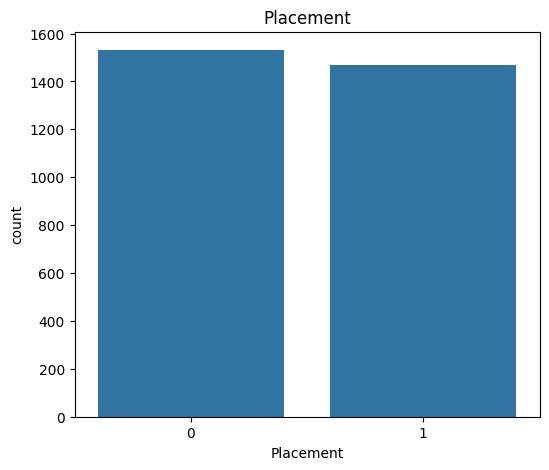

In [36]:
#counter bar chart placement
plt.figure(figsize=(6,5))
sns.countplot(x='Placement',data=df)
plt.title('Placement')
plt.show()

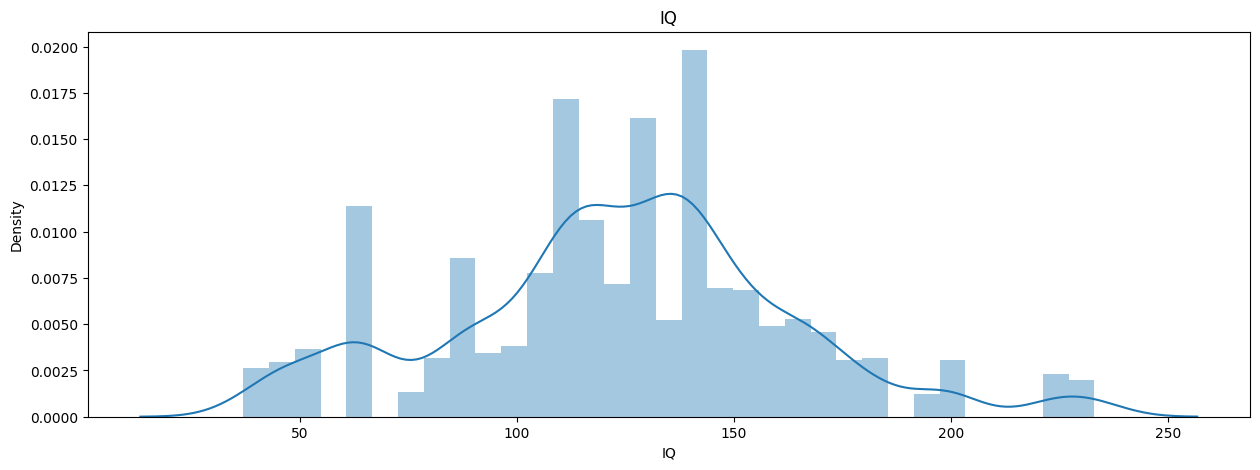

In [37]:
#iq distribution barchrt
plt.figure(figsize=(15,5))
sns.distplot(df['IQ'])
plt.title('IQ')
plt.show()

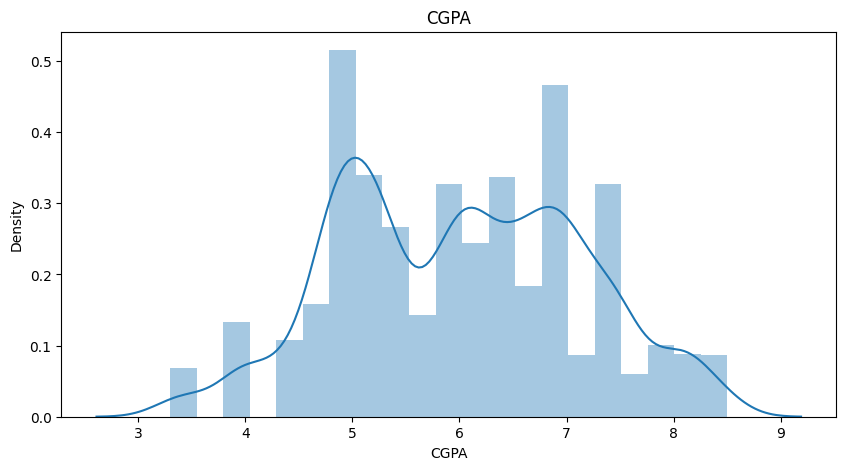

In [38]:
##cgpa distribution displot
plt.figure(figsize=(10,5))
sns.distplot(df['CGPA'])
plt.title('CGPA')
plt.show()

#***Spliting the dataset:-***

In [39]:
X=df.drop('Placement',axis=1)
y=df['Placement']

In [40]:
#spliting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#***Building model:-***

In [41]:
lr=LogisticRegression()

In [42]:
#train the model
lr.fit(X_train,y_train)

LogisticRegression()

In [43]:
#predict the y_predict
y_pred=lr.predict(X_test)

In [44]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


#***Save the model:-***

In [45]:
import joblib
# Save the model
joblib.dump(lr, 'placement_model.pkl')

['placement_model.pkl']